In [12]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

In [2]:
class MLP(d2l.Classifier) :
    def __init__(self, num_outputs, num_hiddens, lr) :
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens), 
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

In [3]:
hidden_units_list = [32, 64, 128, 256, 512, 1024]
train_accuracies = []
val_accuracies = []

In [4]:
print("Testing different numbers of hidden units...")
print("-" * 60)

Testing different numbers of hidden units...
------------------------------------------------------------


Final Validation Accuracy: 0.8504
Completed training for num_hiddens = 1024



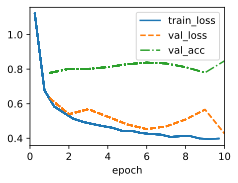

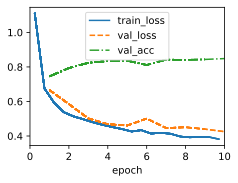

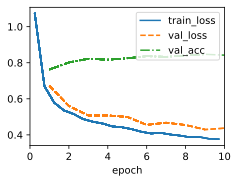

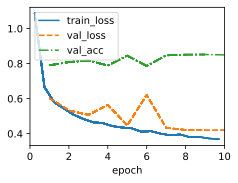

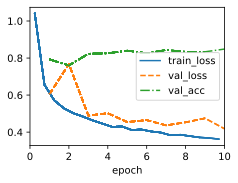

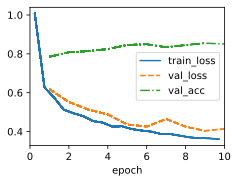

In [5]:
for num_hiddens in hidden_units_list:
    print(f"\n{'='*60}", flush=True)
    print(f"Training with num_hiddens = {num_hiddens}", flush=True)
    print('='*60, flush=True)
    
    # Create model, data, and trainer
    model = MLP(num_outputs=10, num_hiddens=num_hiddens, lr=0.1)
    data = d2l.FashionMNIST(batch_size=256)
    trainer = d2l.Trainer(max_epochs=10)
    
    # Train the model (this will show training graphs automatically)
    trainer.fit(model, data)
    
    # Extract final validation accuracy after training
    val_acc = float(model.board.data['val_acc'][-1][1])
    val_accuracies.append(val_acc)
    
    print(f"Final Validation Accuracy: {val_acc:.4f}", flush=True)
    print(f"Completed training for num_hiddens = {num_hiddens}\n", flush=True)


In [9]:
len(val_accuracies)

6

In [10]:
best_idx = val_accuracies.index(max(val_accuracies))
best_num_hiddens = hidden_units_list[best_idx]
best_val_acc = val_accuracies[best_idx]

In [11]:
print("\n" + "=" * 60)
print(f"Best num_hiddens: {best_num_hiddens}")
print(f"Best validation accuracy: {best_val_acc:.4f}")
print("=" * 60)


Best num_hiddens: 1024
Best validation accuracy: 0.8504


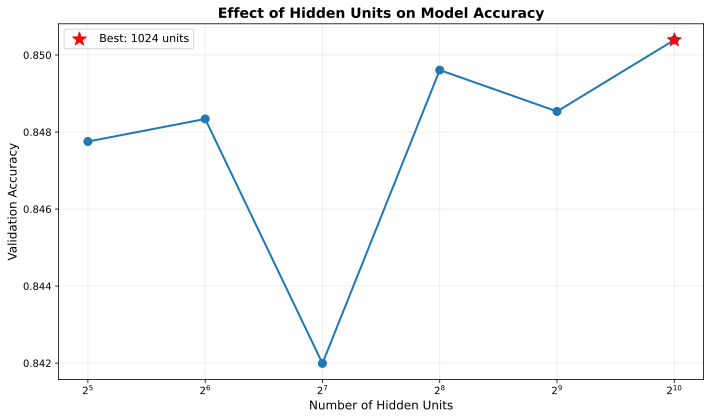

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(hidden_units_list, val_accuracies, 'o-', linewidth=2, markersize=8)
plt.scatter([best_num_hiddens], [best_val_acc], color='red', s=200, 
            marker='*', zorder=5, label=f'Best: {best_num_hiddens} units')
plt.xlabel('Number of Hidden Units', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Effect of Hidden Units on Model Accuracy', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xscale('log', base=2)
plt.tight_layout()
plt.show()
